In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('../Activities.csv')

In [3]:
df

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Total Descent,Avg Stride Length,Training Stress Score®,Decompression,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-11-13 14:17:31,False,Wellingborough Running,3.35,190,00:18:14,142,178,2.8,...,70,1.08,0.0,No,00:00:50.9,3,00:18:06,00:20:18,57,77
1,Running,2024-11-12 18:35:10,False,Wellingborough Running,8.02,510,00:46:13,151,184,3.7,...,160,1.04,0.0,No,00:01:18.6,18,00:46:08,00:51:28,65,88
2,Running,2024-11-08 16:11:06,False,Wellingborough Running,8.05,408,00:40:32,141,166,3.1,...,56,1.17,0.0,No,00:07:51.8,5,00:40:28,00:40:41,73,103
3,Running,2024-11-05 18:19:22,False,Wellingborough Running,6.34,453,00:34:49,169,187,5.0,...,31,1.08,0.0,No,00:08:13.8,4,00:34:44,00:35:02,72,103
4,Running,2024-11-02 08:44:51,False,Watford Running,4.20,205,00:31:49,116,152,1.6,...,21,0.78,0.0,No,00:08:04.7,3,00:31:47,00:32:43,56,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Running,2017-02-21 19:25:34,False,Friary and St. Nicolas Ward Running,5.93,308,00:26:30,148,165,3.0,...,47,1.35,0.0,No,--:--:--,--,--:--:--,00:26:41,36,63
578,Running,2017-02-20 19:38:26,False,Onslow Ward Running,5.77,446,00:33:05,165,180,3.8,...,51,1.05,0.0,No,--:--:--,--,--:--:--,00:36:04,41,83
579,Running,2017-02-18 17:27:55,False,Friary and St. Nicolas Ward Running,6.16,397,00:28:10,174,185,4.1,...,51,1.32,0.0,No,--:--:--,--,--:--:--,00:28:21,36,63
580,Running,2017-02-13 19:35:57,False,Onslow Ward Running,6.08,455,00:34:21,163,176,3.6,...,50,1.08,0.0,No,--:--:--,--,--:--:--,00:35:12,55,89


In [4]:
df['Date'][0]

'2024-11-13 14:17:31'

In [5]:
print(df.columns.tolist())

['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Training Stress Score®', 'Decompression', 'Best Lap Time', 'Number of Laps', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [7]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
type(df['Date'])

pandas.core.series.Series

In [9]:
weekly = df.groupby(pd.Grouper(key='Date', freq='W'))['Distance'].mean().reset_index()
weekly

,Date,Distance
0,2017-02-12,6.040000
1,2017-02-19,6.120000
2,2017-02-26,6.273333
3,2017-03-05,6.363333
4,2017-03-12,6.220000
...,...,...
401,2024-10-20,11.582500
402,2024-10-27,6.693333
403,2024-11-03,3.640000
404,2024-11-10,7.195000


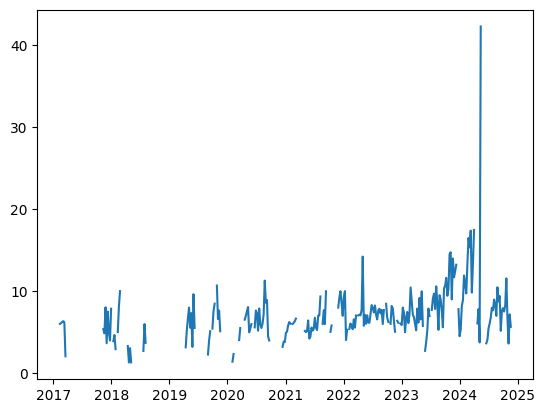

In [10]:
plt.plot(weekly['Date'],weekly['Distance'])

In [11]:
monthly = df.groupby(pd.Grouper(key='Date', freq='ME'))['Distance'].mean().reset_index()
monthly

,Date,Distance
0,2017-02-28,6.282857
1,2017-03-31,3.382500
2,2017-04-30,2.160000
3,2017-05-31,NaN
4,2017-06-30,NaN
...,...,...
89,2024-07-31,7.250000
90,2024-08-31,8.789091
91,2024-09-30,7.787273
92,2024-10-31,8.573333


In [12]:
(df['Avg Pace'][0])

'5:27'

In [13]:
df['Avg Pace'] = pd.to_datetime(df['Avg Pace'], format='%M:%S')
df['Best Pace'] = pd.to_datetime(df['Best Pace'], format='%M:%S')

In [14]:
df['Best Pace']

0     1900-01-01 00:03:47
1     1900-01-01 00:03:25
2     1900-01-01 00:04:12
3     1900-01-01 00:04:12
4     1900-01-01 00:05:25
              ...        
577   1900-01-01 00:03:24
578   1900-01-01 00:04:18
579   1900-01-01 00:03:45
580   1900-01-01 00:04:41
581   1900-01-01 00:04:17
Name: Best Pace, Length: 582, dtype: datetime64[ns]

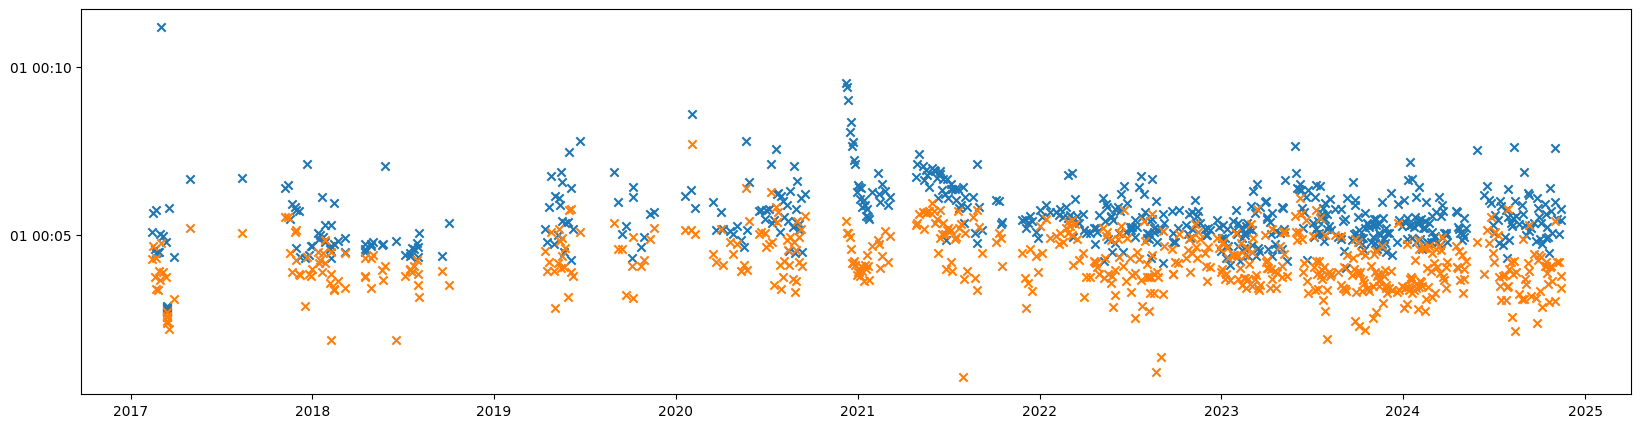

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.scatter(df['Date'],df['Avg Pace'],label='Activity distance',marker='x')
ax.scatter(df['Date'],df['Best Pace'],label='Activity distance',marker='x')
# ax.set_ylim(0, 100) 

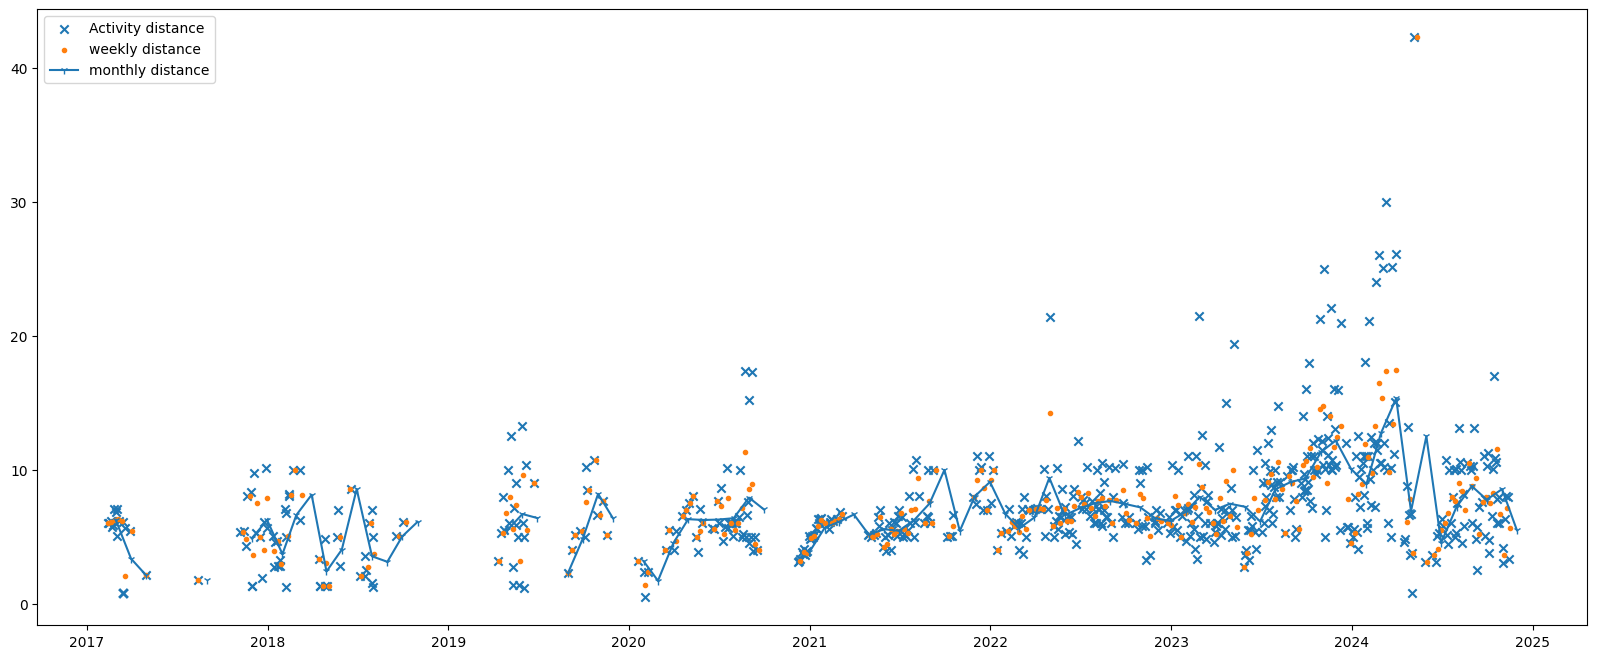

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.scatter(df['Date'],df['Distance'],label='Activity distance',marker='x')
ax.scatter(weekly['Date'],weekly['Distance'],label='weekly distance',marker='.')
ax.plot(monthly['Date'],monthly['Distance'],label='monthly distance',marker='1')
ax.legend()

In [18]:
df_new_dates = pd.to_datetime(df['Date'])
df_new_dates

0     2024-11-13 14:17:31
1     2024-11-12 18:35:10
2     2024-11-08 16:11:06
3     2024-11-05 18:19:22
4     2024-11-02 08:44:51
              ...        
577   2017-02-21 19:25:34
578   2017-02-20 19:38:26
579   2017-02-18 17:27:55
580   2017-02-13 19:35:57
581   2017-02-12 15:06:34
Name: Date, Length: 582, dtype: datetime64[ns]

In [19]:
df.insert(2, "Year", df_new_dates.dt.strftime('%Y'))

In [20]:
df['Year'] = df_new_dates.dt.strftime('%Y')
df['Month'] = df_new_dates.dt.strftime('%m')

In [21]:
df

,Activity Type,Date,Year,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,...,Avg Stride Length,Training Stress Score®,Decompression,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Month
0,Running,2024-11-13 14:17:31,2024,False,Wellingborough Running,3.35,190,00:18:14,142,178,...,1.08,0.0,No,00:00:50.9,3,00:18:06,00:20:18,57,77,11
1,Running,2024-11-12 18:35:10,2024,False,Wellingborough Running,8.02,510,00:46:13,151,184,...,1.04,0.0,No,00:01:18.6,18,00:46:08,00:51:28,65,88,11
2,Running,2024-11-08 16:11:06,2024,False,Wellingborough Running,8.05,408,00:40:32,141,166,...,1.17,0.0,No,00:07:51.8,5,00:40:28,00:40:41,73,103,11
3,Running,2024-11-05 18:19:22,2024,False,Wellingborough Running,6.34,453,00:34:49,169,187,...,1.08,0.0,No,00:08:13.8,4,00:34:44,00:35:02,72,103,11
4,Running,2024-11-02 08:44:51,2024,False,Watford Running,4.20,205,00:31:49,116,152,...,0.78,0.0,No,00:08:04.7,3,00:31:47,00:32:43,56,81,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Running,2017-02-21 19:25:34,2017,False,Friary and St. Nicolas Ward Running,5.93,308,00:26:30,148,165,...,1.35,0.0,No,--:--:--,--,--:--:--,00:26:41,36,63,02
578,Running,2017-02-20 19:38:26,2017,False,Onslow Ward Running,5.77,446,00:33:05,165,180,...,1.05,0.0,No,--:--:--,--,--:--:--,00:36:04,41,83,02
579,Running,2017-02-18 17:27:55,2017,False,Friary and St. Nicolas Ward Running,6.16,397,00:28:10,174,185,...,1.32,0.0,No,--:--:--,--,--:--:--,00:28:21,36,63,02
580,Running,2017-02-13 19:35:57,2017,False,Onslow Ward Running,6.08,455,00:34:21,163,176,...,1.08,0.0,No,--:--:--,--,--:--:--,00:35:12,55,89,02


In [22]:
type(df['Date'])

pandas.core.series.Series

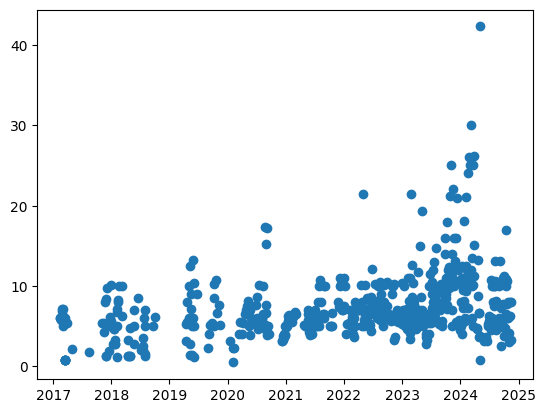

In [24]:
plt.scatter(df['Date'],df['Distance'])

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [27]:
df.columns

Index(['Activity Type', 'Date', 'Year', 'Favorite', 'Title', 'Distance',
       'Calories', 'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Training Stress Score®',
       'Decompression', 'Best Lap Time', 'Number of Laps', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation', 'Month'],
      dtype='object')

In [32]:
features = df[['Distance', 'Avg Pace', 'Avg HR','Aerobic TE','Date']]


In [37]:
features['Avg Pace'][0]

Timestamp('1900-01-01 00:05:27')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

NameError: name 'target' is not defined

In [ ]:
# Load your dataset
data = pd.read_csv('running_data.csv')  # Example file
features = data[['distance_km', 'avg_pace', 'training_volume']]
target = data['race_time_minutes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')
